In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
folder='../datasets'
filename='wn_2019-07-28 20:51:38.907133.csv'

In [3]:
import csv

time_series = []
with open(f"{folder}/{filename}", 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        for x in row:
            try:
                time_series.append(float(x))
            except ValueError:
                pass
            
print(time_series[:10], time_series[-10:])

[0.0, -2.3771027789743657, -1.8086497256901288, 3.0761720251297726, 4.153920302384745, 1.8623539049664692, 1.1540625593261251, 0.6160113091682728, 0.30725462166509937, 6.664170310410933] [-6.046408769157935, 1.863021628560952, 2.6195661741858736, -2.2987723648951213, 4.51236430338404, -3.4859535468993146, -1.5119687063198888, 0.02244175290710269, 1.1646227486632634, -0.6317559714956156]


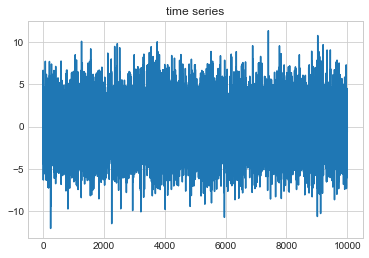

In [4]:
plt.style.use('seaborn-whitegrid')
plt.title("time series")
plt.plot(time_series)
plt.show()

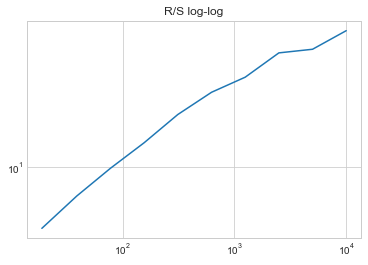

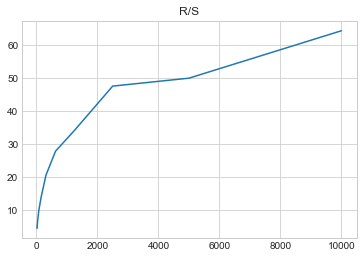

In [5]:
def RdivS(s_time_series):
    mean = 1.0*sum(s_time_series)/len(s_time_series)
    _Yt = [x - mean for x in s_time_series]
    _Zt = np.cumsum(_Yt).tolist()
    _R = max(_Zt) - min(_Zt)
    _S = float(pd.DataFrame(s_time_series).std())
    return _R/_S

def RdivS_by_slice(full_time_series, num_slices):
    rc = []
    slice_size = int(len(full_time_series)/num_slices)
    
    assert slice_size > 10
    
    for i in range(num_slices):
        result = RdivS(full_time_series[i*slice_size:(i+1)*slice_size])
        rc.append(result)
    
    return 1.0*sum(rc)/len(rc), slice_size

rs = []
size = []
for i in range(40):
    try:
        rs_, size_ = RdivS_by_slice(time_series, 2**i)
        rs.append(float(rs_))
        size.append(size_)
    except AssertionError:
        break


plt.plot(size, rs)
plt.xscale("log")
plt.yscale("log")
plt.title("R/S log-log")
plt.show()

plt.plot(size, rs)
plt.title("R/S")
plt.show()

In [6]:
from scipy import stats
from math import log
slope, intercept, r_value, p_value, std_err = stats.linregress( [log(x, 2) for x in size], [log(x, 2) for x in rs])

print(f"slope:{slope},intercept:{intercept},r_value:{r_value},p_value={p_value},std_err={std_err}")


slope:0.42829256552915196,intercept:0.5849375266356782,r_value:0.988623748570224,p_value=7.228257535084938e-08,std_err=0.02303776825581482
